# **Clustering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ml_ready_airport_airline.csv')

df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,5,2023,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1636.0,256.0,55.98,...,0.00,108.57,32.0,11.0,29768.0,9339.0,4557.0,4676.0,0.0,11196.0
1,23,2023,8,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",232.0,38.0,9.94,...,0.00,13.60,9.0,1.0,2617.0,752.0,49.0,753.0,0.0,1063.0
2,36,2023,8,9E,Endeavor Air Inc.,EWR,"Newark, NJ: Newark Liberty International",150.0,21.0,9.70,...,0.00,6.38,2.0,0.0,1264.0,620.0,0.0,237.0,0.0,407.0
3,50,2023,8,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1576.0,213.0,49.85,...,0.10,72.82,32.0,0.0,21184.0,6213.0,2806.0,5420.0,5.0,6740.0
4,54,2023,8,9E,Endeavor Air Inc.,LGA,"New York, NY: LaGuardia",3171.0,438.0,116.05,...,0.07,161.45,77.0,8.0,37080.0,13761.0,1274.0,8613.0,6.0,13426.0


In [ ]:
# 1. Filter rows with any nonzero total delay
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df['total_delay'] = df[delay_cols].sum(axis=1) # calculating total delay for each column
df_filtered = df[df['total_delay'] > 0].copy()

# 2. Normalize to get delay composition (shares)
for col in delay_cols:
    df_filtered[f'{col}_share'] = df_filtered[col] / df_filtered['total_delay']

cause_share_cols = [f'{col}_share' for col in delay_cols]

df_filtered

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,carrier_delay_share,weather_delay_share,nas_delay_share,security_delay_share,late_aircraft_delay_share
0,5,2023,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1636.0,256.0,55.98,...,4557.0,4676.0,0.0,11196.0,29768.0,0.313726,0.153084,0.157081,0.000000,0.376109
1,23,2023,8,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",232.0,38.0,9.94,...,49.0,753.0,0.0,1063.0,2617.0,0.287352,0.018724,0.287734,0.000000,0.406190
2,36,2023,8,9E,Endeavor Air Inc.,EWR,"Newark, NJ: Newark Liberty International",150.0,21.0,9.70,...,0.0,237.0,0.0,407.0,1264.0,0.490506,0.000000,0.187500,0.000000,0.321994
3,50,2023,8,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1576.0,213.0,49.85,...,2806.0,5420.0,5.0,6740.0,21184.0,0.293287,0.132458,0.255853,0.000236,0.318165
4,54,2023,8,9E,Endeavor Air Inc.,LGA,"New York, NY: LaGuardia",3171.0,438.0,116.05,...,1274.0,8613.0,6.0,13426.0,37080.0,0.371117,0.034358,0.232282,0.000162,0.362082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21878,171617,2013,8,YV,Mesa Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",892.0,173.0,29.87,...,289.0,1929.0,55.0,7255.0,12237.0,0.221378,0.023617,0.157637,0.004495,0.592874
21879,171620,2013,8,YV,Mesa Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1017.0,68.0,24.30,...,56.0,451.0,79.0,809.0,3281.0,0.574825,0.017068,0.137458,0.024078,0.246571
21880,171633,2013,8,YV,Mesa Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",71.0,8.0,1.98,...,0.0,120.0,0.0,54.0,276.0,0.369565,0.000000,0.434783,0.000000,0.195652
21881,171640,2013,8,YV,Mesa Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",135.0,37.0,8.93,...,0.0,636.0,0.0,1011.0,1929.0,0.146190,0.000000,0.329705,0.000000,0.524106


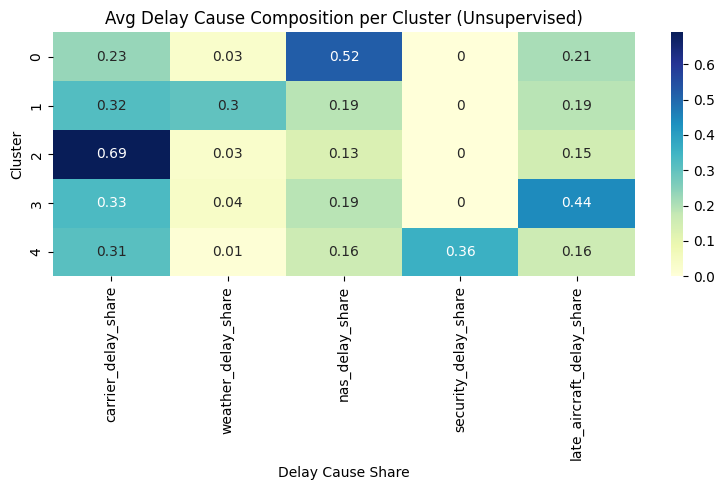

In [ ]:
# 3. Scale + cluster
X = df_filtered[cause_share_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['unsup_cluster'] = kmeans.fit_predict(X_scaled)

# Visualize cluster centers
cluster_summary = df_filtered.groupby('unsup_cluster')[cause_share_cols].mean().round(2)
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu")
plt.title("Avg Delay Cause Composition per Cluster (Unsupervised)")
plt.ylabel("Cluster")
plt.xlabel("Delay Cause Share")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Compare with actual dominant delay cause
df_filtered['true_cause'] = df_filtered[delay_cols].idxmax(axis=1).str.replace('_delay', '')

# 5. Cross-tabulation (cluster vs true cause)
comparison_table = pd.crosstab(df_filtered['unsup_cluster'], df_filtered['true_cause'], normalize='index')
print("Cluster Composition by True Dominant Cause:\n")
print(comparison_table.round(2))

# true cause - defined as largest shares among all different causes


df_filtered

Cluster Composition by True Dominant Cause:

true_cause     carrier  late_aircraft   nas  security  weather
unsup_cluster                                                 
0                 0.10           0.01  0.90      0.00     0.00
1                 0.44           0.18  0.17      0.00     0.21
2                 1.00           0.00  0.00      0.00     0.00
3                 0.29           0.69  0.02      0.00     0.00
4                 0.34           0.09  0.22      0.34     0.00


,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_delay,late_aircraft_delay,total_delay,carrier_delay_share,weather_delay_share,nas_delay_share,security_delay_share,late_aircraft_delay_share,unsup_cluster,true_cause
0,5,2023,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1636.0,256.0,55.98,...,0.0,11196.0,29768.0,0.313726,0.153084,0.157081,0.000000,0.376109,3,late_aircraft
1,23,2023,8,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",232.0,38.0,9.94,...,0.0,1063.0,2617.0,0.287352,0.018724,0.287734,0.000000,0.406190,3,late_aircraft
2,36,2023,8,9E,Endeavor Air Inc.,EWR,"Newark, NJ: Newark Liberty International",150.0,21.0,9.70,...,0.0,407.0,1264.0,0.490506,0.000000,0.187500,0.000000,0.321994,3,carrier
3,50,2023,8,9E,Endeavor Air Inc.,JFK,"New York, NY: John F. Kennedy International",1576.0,213.0,49.85,...,5.0,6740.0,21184.0,0.293287,0.132458,0.255853,0.000236,0.318165,3,late_aircraft
4,54,2023,8,9E,Endeavor Air Inc.,LGA,"New York, NY: LaGuardia",3171.0,438.0,116.05,...,6.0,13426.0,37080.0,0.371117,0.034358,0.232282,0.000162,0.362082,3,carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21878,171617,2013,8,YV,Mesa Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",892.0,173.0,29.87,...,55.0,7255.0,12237.0,0.221378,0.023617,0.157637,0.004495,0.592874,3,late_aircraft
21879,171620,2013,8,YV,Mesa Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1017.0,68.0,24.30,...,79.0,809.0,3281.0,0.574825,0.017068,0.137458,0.024078,0.246571,2,carrier
21880,171633,2013,8,YV,Mesa Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",71.0,8.0,1.98,...,0.0,54.0,276.0,0.369565,0.000000,0.434783,0.000000,0.195652,0,nas
21881,171640,2013,8,YV,Mesa Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",135.0,37.0,8.93,...,0.0,1011.0,1929.0,0.146190,0.000000,0.329705,0.000000,0.524106,3,late_aircraft


In [ ]:
# Map cluster to most common true label
cluster_to_true = df_filtered.groupby('unsup_cluster')['true_cause'].agg(lambda x: x.value_counts().idxmax())
mapped_preds = df_filtered['unsup_cluster'].map(cluster_to_true)

# Accuracy score
acc = accuracy_score(df_filtered['true_cause'], mapped_preds)
print(f"Approximate Clustering Accuracy: {acc:.2f}")

Approximate Clustering Accuracy: 0.79


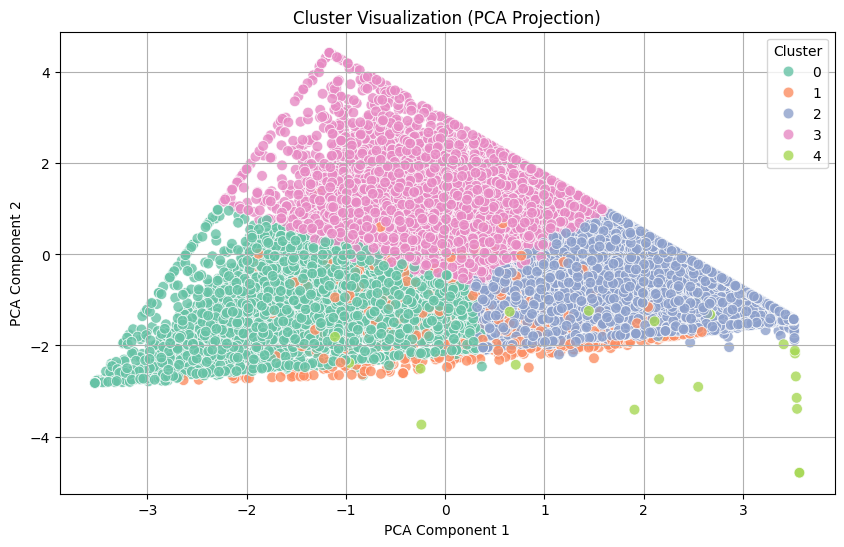

In [ ]:
# PCA to visualize clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. PCA reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_filtered['unsup_cluster'], palette="Set2", s=60, alpha=0.8)
plt.title("Cluster Visualization (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

PCA explained variance ratio: [0.32088369 0.27089466]


In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Step 1: PCA to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Step 2: Add PCA results + metadata to a DataFrame
df_plot = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'Cluster': df_filtered['unsup_cluster'].astype(str),
    'Dominant Cause': df_filtered['true_cause'],
    'Airport': df_filtered['airport'],
    'Carrier': df_filtered['carrier']
})

# Step 3: 3D scatter plot with Plotly
fig = px.scatter_3d(
    df_plot,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    symbol='Dominant Cause',
    hover_data=['Airport', 'Carrier'],
    opacity=0.75,
    title='3D PCA Cluster Visualization (Delay Composition)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'PC 2', 'PC3': 'PC 3'}
)

fig.update_traces(marker=dict(size=4))
fig.show()


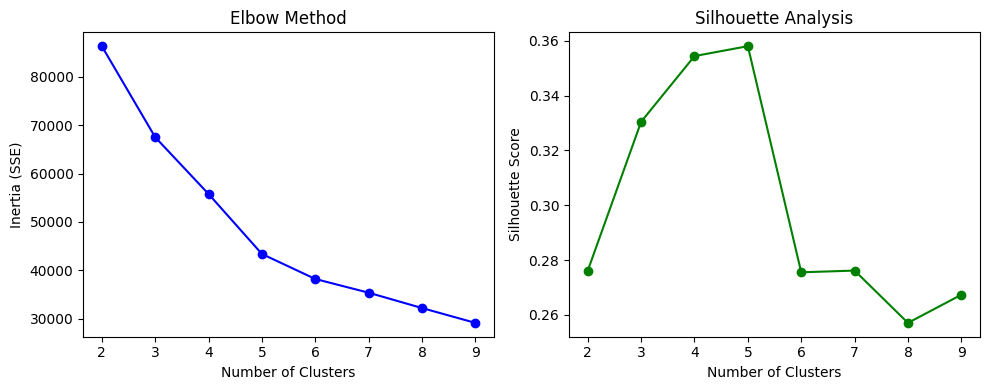

In [ ]:
# elbow plot
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouettes = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Step 1: Aggregate delay stats
agg_df = df.groupby(['airport', 'carrier'])['arr_delay'].agg(['mean', 'std', 'count']).reset_index()
agg_df.columns = ['airport', 'carrier', 'avg_arr_delay', 'std_arr_delay', 'num_flights']

# Step 2: Drop rows with missing values
agg_df = agg_df.dropna()

# Step 3: Scale features
features = ['avg_arr_delay', 'std_arr_delay', 'num_flights']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df[features])


In [ ]:
# Step 4: KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
agg_df['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Map clusters to descriptive labels
centers = kmeans.cluster_centers_[:, 0]
sorted_indices = centers.argsort()
risk_labels = ['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']
cluster_map = {cluster: risk_labels[rank] for rank, cluster in enumerate(sorted_indices)}
agg_df['risk_level'] = agg_df['risk_cluster'].map(cluster_map)

# Step 6: PCA for 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
agg_df['PC1'] = X_pca[:, 0]
agg_df['PC2'] = X_pca[:, 1]

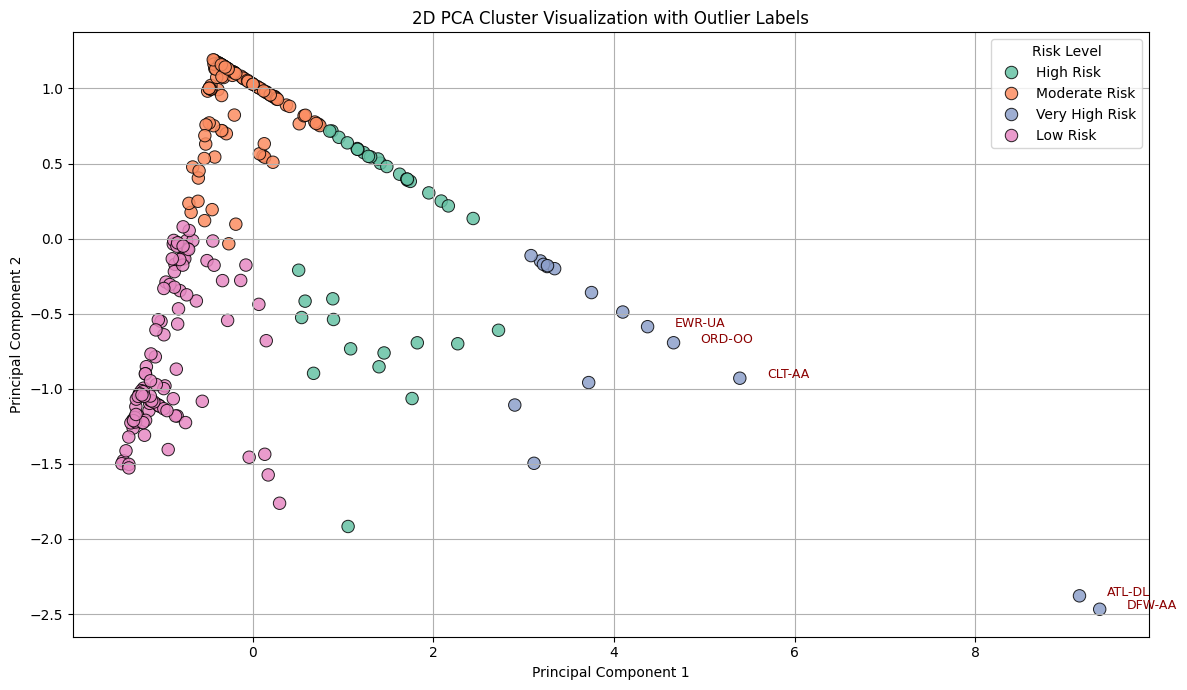

In [ ]:
# Step 7: PCA Scatterplot with outlier labels
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=agg_df,
    x='PC1', y='PC2',
    hue='risk_level',
    palette='Set2',
    s=80,
    edgecolor='black',
    alpha=0.85
)

# Label top 5 Very High Risk outliers
top_outliers = agg_df[agg_df['risk_level'] == 'Very High Risk'].nlargest(5, 'avg_arr_delay')
for _, row in top_outliers.iterrows():
    plt.text(
        row['PC1'] + 0.3, row['PC2'],
        f"{row['airport']}-{row['carrier']}",
        fontsize=9,
        color='darkred'
    )

plt.title("2D PCA Cluster Visualization with Outlier Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Risk Level')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-84-1975fdc4ed93>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




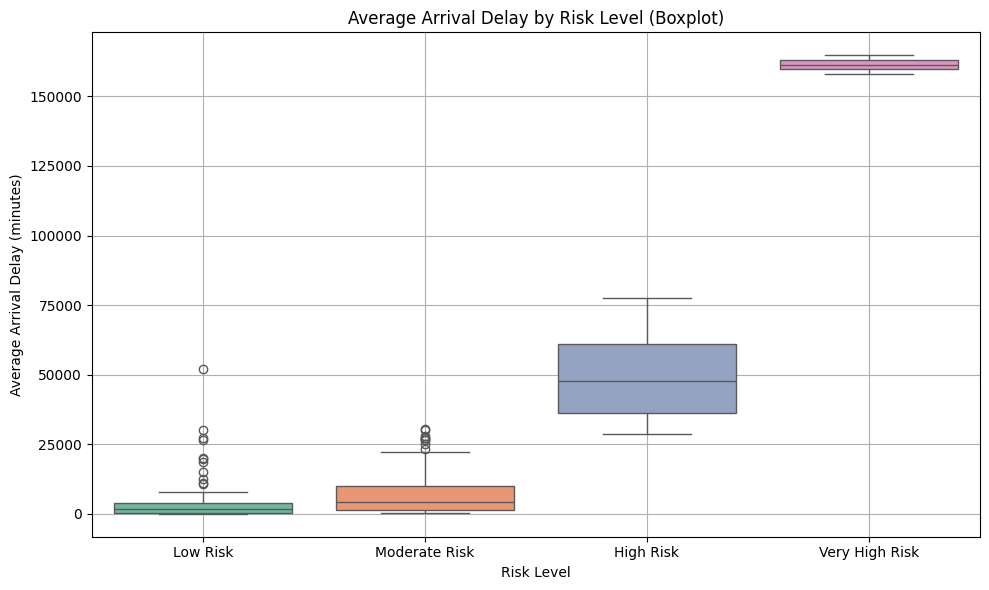

    airport carrier  avg_arr_delay  std_arr_delay  num_flights  risk_cluster  \
50      DFW      AA  164761.909091   78898.238312          121             2   
4       ATL      DL  157980.305785   78743.396931          121             2   
158     ORD      OO   77557.305785   45468.074864          121             1   
78      EWR      UA   72821.132231   43119.229978          121             1   
18      CLT      AA   70740.396694   61687.614451          121             1   
160     ORD      UA   70715.165289   39563.918084          121             1   
25      CLT      OH   65729.955882   33078.225477           68             1   
155     ORD      MQ   63640.948454   40387.823104           97             1   
43      DEN      OO   61601.008264   30182.509477          121             1   
149     ORD      AA   61157.132231   29731.923857          121             1   

         risk_level       PC1       PC2  
50   Very High Risk  9.060883 -2.319804  
4    Very High Risk  8.844057 -2.23

In [ ]:
# Step 8: Boxplot of average delay by risk level
plt.figure(figsize=(10, 6))
sns.boxplot(data=agg_df, x='risk_level', y='avg_arr_delay', order=risk_labels, palette='Set2')
plt.title("Average Arrival Delay by Risk Level (Boxplot)")
plt.xlabel("Risk Level")
plt.ylabel("Average Arrival Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Preview top 10 highest delays
print(agg_df.sort_values(by='avg_arr_delay', ascending=False).head(10))



**LAST STEP**

In [ ]:
# Step 1: Group by carrier and airport, sum all arrival delays
df_10yr_avg = (
    df.groupby(['carrier', 'airport'])['arr_delay']
    .sum()
    .reset_index()
)

# Step 2: Divide by 10 to get yearly average
df_10yr_avg['avg_arr_delay_10yr'] = df_10yr_avg['arr_delay'] / 10

# Step 3: Drop the raw sum column to keep only what's needed
df_10yr_avg = df_10yr_avg.drop(columns='arr_delay')

# Step 4: Rearrange columns for clarity
df_10yr_avg = df_10yr_avg[['carrier', 'airport', 'avg_arr_delay_10yr']]

# Step 5: Confirm expected shape (241 rows, 3 columns)
print(df_10yr_avg.shape)  # should print (241, 3)

# Step 6: Export to CSV
df_10yr_avg.to_csv("avg_arrival_delay_by_carrier_airport.csv", index=False)
print("Exported to 'avg_arrival_delay_by_carrier_airport.csv'")

(241, 3)
Exported to 'avg_arrival_delay_by_carrier_airport.csv'
